# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

En el # importar librerías lo que hice fue poner -import pandas as pd-, que es como se importan los archivos. A pesar de que en total son 5 archivos solo lo puse una vez ya que para todos es igual. En el # leer conjunto de datos en los DataFrame, le creé a cada archivo un nombre diferente de variable y  agregué el argumento (sep=';') para solucionar el delimitador que estaba utilizando Pandas que era la coma estándar (,), lo que causaba que todos los datos aparecieran en una única columna. Al final y como algo adicional utilicé en cada uno el método head() para ver las primeras filas de cada archivo.

In [ ]:
# importar librerías
import pandas as pd

import matplotlib.pyplot as plt

In [ ]:
# leer conjuntos de datos en los DataFrames
df_inst = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
df_prod = pd.read_csv('/datasets/products.csv', sep=';')
df_ais = pd.read_csv('/datasets/aisles.csv', sep=';')
df_depa = pd.read_csv('/datasets/departments.csv', sep=';')
df_ord = pd.read_csv('/datasets/order_products.csv', sep=';')

In [ ]:
# mostrar información del DataFrame
df_inst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [ ]:
# mostrar información del DataFrame
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [ ]:
# mostrar información del DataFrame
df_ais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [ ]:
# mostrar información del DataFrame
df_depa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [ ]:
# mostrar información del DataFrame
df_ord.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [ ]:
print(df_inst.head())
print()
print(df_prod.head())
print()
print(df_ais.head())
print()
print(df_depa.head())
print()
print(df_ord.head())

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

   days_since_prior_order  
0                    30.0  
1                     9.0  
2                     2.0  
3                    10.0  
4                    17.0  

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                   

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

La información concuerda con las archivos menos el de uno: /datasets/order_products.csv, al sacar la información me dice que hay 4545007 entradas y en el archivo solo hay 1048575. Eso fue lo único que no me quedó claro. Como explique anteriormente el resto de la información se ajusta con lo que revisé en los archivos y seguí los parámetros establecidos en las instrucciones agregando el argumento sep= para separar los archivos por ;.Al final y auqnue no me lo pedían, utilicé el método head() para ver las primeras 5 filas de cada archivo.

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.b
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [ ]:
# Revisa si hay pedidos duplicados
df_inst.duplicated().sum()

15

In [ ]:
df_inst[df_inst.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Sí, tengo 15 filas repetidas. Todas las filas repetidas fueron el miércoles a las 2:00 a.m.

In [ ]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
df_inst.query('order_dow == 3 and order_hour_of_day == 2')

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


In [ ]:
df_inst[df_inst.duplicated()].shape[0]/df_inst.query('order_dow == 3 and order_hour_of_day == 2').shape[0]

0.12396694214876033

¿Qué sugiere este resultado?

Esto sugiere que del total de facturas emitidas el miércoles a las 2:00 a.m. el 12% son repetidas.

In [ ]:
# Elimina los pedidos duplicados
df_inst.drop_duplicates()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


In [ ]:
# Vuelve a verificar si hay filas duplicadas
df_inst= df_inst.drop_duplicates()

In [ ]:
df_inst.duplicated().sum()

0

In [ ]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos

df_inst['order_id'].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos

Ya no hay IDs duplicados ni tampoco filas, como explique más arriba se pudo constatar que del total de facturas emitidas el miércoles a las 2:00 a.m. el 12% son repetidas.

### `products` data frame

In [ ]:
# Verifica si hay filas totalmente duplicadas
df_prod.duplicated().sum()

0

In [ ]:
# Revisa únicamente si hay ID de departamentos duplicados
df_prod['department_id'].duplicated().sum()

49673

In [ ]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
df_prod['product_name'].str.upper().duplicated().sum()

1361

In [ ]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
duplicados_productos = df_prod[(~df_prod['product_name'].isna()) & (df_prod['product_name'] != 'Unknown') & (df_prod['product_name'].str.strip().str.upper().duplicated(keep=False))
]

num_duplicados = len(duplicados_productos)
print("Número de productos duplicados (excluyendo 'Unknown' y nulos):", num_duplicados)

Número de productos duplicados (excluyendo 'Unknown' y nulos): 207


In [ ]:
# Revisa si hay nombres duplicados de productos no faltantes
df_prod[df_prod['product_name'].isna()==False]['product_name'].duplicated().sum()

1257

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Tomé los datos del archivo products.csv; primero revisé si habían duplicados con el método duplicated() e hice la sumatoria con el método sum(). Después llamé a la columna 'department_id' para revisar si había valores duplicados, prácticamente todos fueron valores duplicados, ya que el número 49,673 representa la cantidad de veces que un producto pertenece a un departamento que ya apareció antes en la lista.
En los dos últimos ejercicios llamé a la columna 'product_name', en el primero volví a utilizar el método dplicated() y el método sum() para saber los nombres duplicados, sin embargo, antes utilicé el método Upper() para convertir todo a mayúsculas. Finalmente, volví a utilizar los métodos duplicated() y sum(), pero esta vez para encontrar con ayuda de isna() los valores no faltantes, es decir, los valores que no son ausentes.

### `departments` data frame

In [ ]:
# Revisa si hay filas totalmente duplicadas
df_depa.duplicated().sum()

0

In [ ]:
# Revisa únicamente si hay IDs duplicadas de productos
df_depa['department_id'].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

No hay mucho que agregar, solamente hay 2 columnas y 21 filas, no hay valores duplicados en ninguna de las dos columnas. Se aplicó en ambos ejercicios los métodos duplicated() y sum() para saber el número total de duplicados,  la respuesta fue 0. La única diferencia, fue que en el segundo ejercicio se llamó a la columna 'department_id' para ver si esa columna tenía duplicados.

### `aisles` data frame

In [ ]:
# Revisa si hay filas totalmente duplicadas
df_ais.duplicated().sum()

0

In [ ]:
# Revisa únicamente si hay IDs duplicadas de pasillos
df_ais['aisle_id'].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Lo mismo que en el ejercicio anterior, solamente hay 2 columnas pero esta vez con 134 filas, no hay valores duplicados en ninguna de las dos. Se aplicó en ambos ejercicios los métodos duplicated() y sum() para saber el número total de duplicados, la respuesta fue 0. La única diferencia, fue que en el segundo ejercicio se llamó a la columna 'aisle_id' para ver si tenía tenía duplicados.

### `order_products` data frame

In [ ]:
# Revisa si hay filas totalmente duplicadas
df_ord.duplicated().sum()

0

In [ ]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
df_ord.duplicated(subset=['order_id', 'product_id']).sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.
En este ejercicio desde el comienzo se uso el parámetro "show_counts=True" en df_ord.info() muestra el conteo exacto de valores no nulos por columna. Esto sirvió para ver detalles en la calidad de los datos.
La única diferencia con los ejercicios de los demás archivos, es que en order_products.csv se utilizó el parámetro subset=, esto me sirvió porque me interesaba revisar si había duplicados "engañosos" (por ejemplo, si en un mismo pedido se agregó el mismo producto más de una vez), en ese caso utilicé subset para comparar solo las columnas order_id y product_id.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [ ]:
# Encuentra los valores ausentes en la columna 'product_name'
df_prod[df_prod['product_name'].isna()]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.

Llamé a la columna 'product_name', esto me devolvió todas las filas donde product_name es NaN (pero solo las primeras y últimas 5 filas).

In [ ]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100? Sí.
ausentes= df_prod[df_prod['product_name'].isna()]

In [ ]:
print(ausentes['aisle_id'].unique())

[100]


Describe brevemente cuáles son tus hallazgos.
Primero llamé a la columna 'product_name', esto me devolvió todas las filas donde product_name es NaN (pero solo las primeras y últimas 5 filas). Por esta razón, guardé todo el código en la variable ausentes= para no tener que volver a filtrar cada vez que tenga que trabajar con esos datos. Finalmente, verifiqué si la columna aisle_id tenía valores únicos con el método unique(), ahí pude comprobar que el resultado es [100], esto significa que todos los valores ausentes de product_name están en el pasillo con ID 100.

In [ ]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print(ausentes['department_id'].unique())

[21]


Describe brevemente cuáles son tus hallazgos.

Sí, todos los nombres de productos ausentes están relacionados con el departamento con ID 21.

El procedimiento fue el siguiente: filtré los registros donde product_name es NaN y los guardas en la variable "ausentes".

Luego, revisé la columna department_id en ese subconjunto usando el método .unique(), que me mostró todos los valores únicos, en este caso 21. La conclusión es que cada producto sin nombre pertenece al departamento 21.

In [ ]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
departments=ausentes.merge(df_depa, on='department_id', how='left')
print(departments)

      product_id product_name  aisle_id  department_id department
0             38          NaN       100             21    missing
1             72          NaN       100             21    missing
2            110          NaN       100             21    missing
3            297          NaN       100             21    missing
4            417          NaN       100             21    missing
...          ...          ...       ...            ...        ...
1253       49553          NaN       100             21    missing
1254       49575          NaN       100             21    missing
1255       49641          NaN       100             21    missing
1256       49664          NaN       100             21    missing
1257       49669          NaN       100             21    missing

[1258 rows x 5 columns]


In [ ]:
resultado= departments.merge(df_ais, on='aisle_id', how='left')
print(resultado)

      product_id product_name  aisle_id  department_id department    aisle
0             38          NaN       100             21    missing  missing
1             72          NaN       100             21    missing  missing
2            110          NaN       100             21    missing  missing
3            297          NaN       100             21    missing  missing
4            417          NaN       100             21    missing  missing
...          ...          ...       ...            ...        ...      ...
1253       49553          NaN       100             21    missing  missing
1254       49575          NaN       100             21    missing  missing
1255       49641          NaN       100             21    missing  missing
1256       49664          NaN       100             21    missing  missing
1257       49669          NaN       100             21    missing  missing

[1258 rows x 6 columns]


In [ ]:
print(resultado[['product_id', 'department', 'aisle']])

      product_id department    aisle
0             38    missing  missing
1             72    missing  missing
2            110    missing  missing
3            297    missing  missing
4            417    missing  missing
...          ...        ...      ...
1253       49553    missing  missing
1254       49575    missing  missing
1255       49641    missing  missing
1256       49664    missing  missing
1257       49669    missing  missing

[1258 rows x 3 columns]


In [ ]:
print(resultado['department'].unique())
print(resultado['aisle'].unique())

['missing']
['missing']


Describe brevemente cuáles son tus hallazgos.

Todos los valores de department y aisle con pasillo ID 100 y el departamento con ID 21 son faltantes. Al ser todos productos ausentes no se encuentra la información del apartamento o el aisle.

In [ ]:
# Completa los nombres de productos ausentes con 'Unknown'

df_prod['product_name']=df_prod['product_name'].fillna('Unknown')

df_prod['product_name'].isna().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se reemplezaron los valores faltantes por unknown a través del método fillna() llamando a la columna 'product_name'.

### `orders` data frame

In [ ]:
# Encuentra los valores ausentes

df_inst.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [ ]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
df_inst[df_inst['days_since_prior_order'].isna()]['order_number'].unique()

array([1])

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Todos los valores faltantes de la columna "days_since_prior_order# vienen de las primeras compras de los clientes.

### `order_products` data frame

In [ ]:
# Encuentra los valores ausentes
df_ord.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [ ]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
df_ord[df_ord['add_to_cart_order'].isna()]

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [ ]:
df_ord['add_to_cart_order'].min()

1.0

In [ ]:
df_ord['add_to_cart_order'].max()

64.0

Describe brevemente cuáles son tus hallazgos.

Se sacaron los valores ausentes de la columna 'add_to_cart_order', y se pudo constatar que el orden secuencial en el que se añadió cada artículo al carrito tuvo un mínimo de 1 producto y un máximo de 64.

In [ ]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
order_ids_con_nulos = df_ord[df_ord['add_to_cart_order'].isna()]['order_id']
print(order_ids_con_nulos)

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [ ]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.


No, no todos los pedidos con valores ausentes tienen más de 64 productos. De hecho, dado que el valor máximo de la columna add_to_cart_order es 64, ninguno de los pedidos —ni siquiera aquellos con valores ausentes— tiene más de 64 productos. Por ello, la presencia de valores nulos en esa columna se debe a otros problemas en la secuencia de registro, y no a que el pedido supere los 64 artículos.

In [ ]:
missing_df = df_ord[df_ord['add_to_cart_order'].isna()]

grouped_missing = missing_df.groupby('order_id')

print("Número de pedidos con datos ausentes:", grouped_missing.ngroups)

Número de pedidos con datos ausentes: 70


In [ ]:
order_product_count = df_ord.groupby('order_id')['product_id'].count()

min_products = order_product_count.min()

print("El valor mínimo del conteo de 'product_id' en cada pedido es:", min_products)

El valor mínimo del conteo de 'product_id' en cada pedido es: 1


Describe brevemente cuáles son tus hallazgos.

En la segunda pregunta, al agrupar las filas con datos ausentes en la columna add_to_cart_order por su order_id, encontramos que hay 70 pedidos únicos afectados. Esto es interesante porque, aunque a nivel de registro existen 836 filas con valores nulos en add_to_cart_order, estos se agrupan en solo 70 pedidos. Esto sugiere que en ciertos pedidos (aproximadamente 70 de todos los pedidos en el dataset) no se registró la secuencia en la que se añadieron los productos al carrito. En la tercera pregunta, al agrupar el dataset por 'order_id' y contar la cantidad de 'product_id' en cada pedido, se encontró que el valor mínimo del conteo es 1. Esto indica que al menos hay un pedido que contiene solo un producto.

In [ ]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_ord['add_to_cart_order'].fillna(999, inplace=True)
df_ord['add_to_cart_order'] = df_ord['add_to_cart_order'].astype(int)

In [ ]:
df_ord['add_to_cart_order'].isna().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

En este ejercicio utilicé el método .fillna(999, inplace=True), esto me permitió reemplazar los valores nulos por el número 999, luego use el método .astype(int) para convertir la columna a tipo entero, finalmente, para comprobar que el cambio estaba hecho utilicé los métodos isna() y sum(), el resultado me dio 0 lo cual significa que los valores ausentes fueron reemplazados correctamente.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos.

En ejercicio se detctaron los siguientes puntos clave:

-Hay 836 productos con datos faltantes en add_to_cart_order.

-De estos productos  70 pedidos son únicos.

-No todos los pedidos con datos nulos tienen más de 64 productos.

-El mínimo número de productos en un pedido es 1.

-Se reemplazaron los valores ausentes con 999 para evitar problemas en los cálculos.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [ ]:
print("order_hour_of_day: min =", df_inst['order_hour_of_day'].min(), ", max =", df_inst['order_hour_of_day'].max())

order_hour_of_day: min = 0 , max = 23


In [ ]:
print("order_dow: min =", df_inst['order_dow'].min(), ", max =", df_inst['order_dow'].max())

order_dow: min = 0 , max = 6


Escribe aquí tus conclusiones

La columna order_hour_of_day debe contener valores entre 0 y 23, ya que estos  representan las horas del día en formato de 24 horas, si hay algún valor por debajo de 0 o superior a 23, se consideraría un error, ya que no se puede tener una "hora" que no esté dentro de este rango. La respuesta está bien.

La columna order_dow debe contener valores entre 0 y 6, donde cada número representa un día de la semana (0 para domingo, 1 para lunes, y así sucesivamente hasta 6 que representa sábado). Aquí, al igual que con las horas, un valor fuera de este rango significaría que hay un error en los datos.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

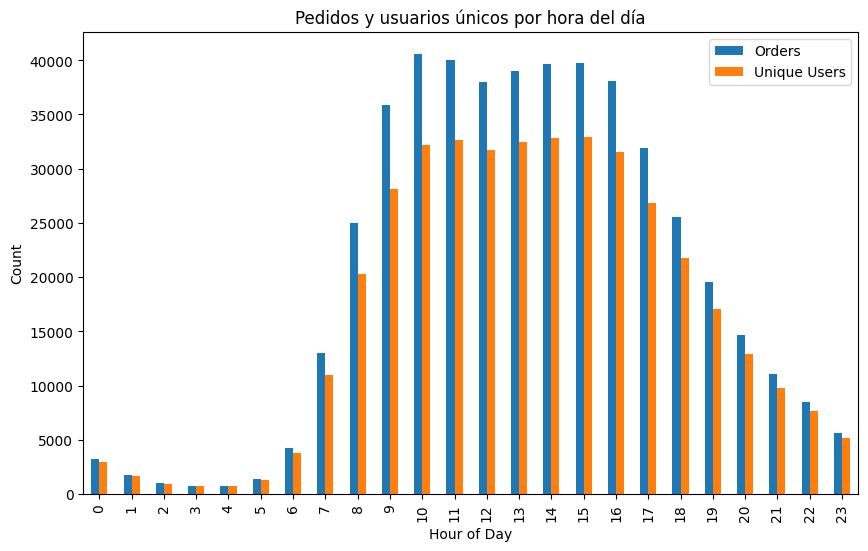

In [ ]:
hourly_orders = df_inst.groupby('order_hour_of_day')['order_id'].count()
hourly_users = df_inst.groupby('order_hour_of_day')['user_id'].nunique()

df_combined = pd.DataFrame({"Orders": hourly_orders, "Unique Users": hourly_users
})

df_combined.plot(kind='bar', figsize=(10,6))
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.title("Pedidos y usuarios únicos por hora del día")
plt.legend()
plt.show()

In [ ]:
hourly_orders = df_inst.groupby('order_hour_of_day')['order_id'].count()

In [ ]:
hourly_orders

order_hour_of_day
0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_id, dtype: int64

In [ ]:
hourly_users = df_inst.groupby('order_hour_of_day')['user_id'].nunique()

In [ ]:
hourly_users

order_hour_of_day
0      2991
1      1671
2       958
3       744
4       735
5      1281
6      3757
7     10993
8     20268
9     28112
10    32195
11    32660
12    31754
13    32433
14    32797
15    32894
16    31579
17    26825
18    21795
19    17026
20    12891
21     9806
22     7670
23     5167
Name: user_id, dtype: int64

Escribe aquí tus conclusiones

Hice dos cosas: la primera verificar cuántos pedidos se hacían por hora y la segunda verificar cuántos usuarios únicos hacían pedidos por hora, eso lo combine en una sola gráfica y posteriormente saque de cada no por a aparte, como se puede ver debajo del gráfico. ¿Qué se pudo comprobar? Que la mayor cantidad de usuarios únicos por hora es a las 15:00, un total de 32.894 usuarios únicos. También se pudo comprobar que a las 10:00 a.m. es donde hace una mayor cantidad de pedidos únicos, 40578 en total.

### [A3] ¿Qué día de la semana compran víveres las personas?

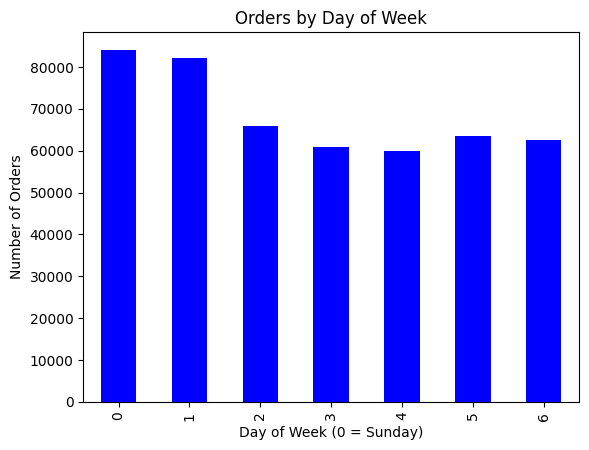

In [ ]:
dow_orders = df_inst.groupby('order_dow')['order_id'].count()

dow_orders.plot(kind='bar', color='blue', title="Orders by Day of Week")
plt.xlabel("Day of Week (0 = Sunday)")
plt.ylabel("Number of Orders")
plt.show()

In [ ]:
Total_orders=df_inst.groupby('order_dow')['order_id'].count()

In [ ]:
Total_orders

order_dow
0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: order_id, dtype: int64

Escribe aquí tus conclusiones

Para resolver el ejercicio se agrupa el DataFrame por order_dow (día de la semana) y se cuenta cuántos pedidos se hicieron en cada día. después, se crea un gráfico de barras con título y etiquetas para identificar claramente el día de la semana (donde 0 corresponde a domingo y 6 es el día sábado).

El día con más órdenes es el domingo, con 84,090.
El día con menos órdenes es el jueves, con 59,810.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

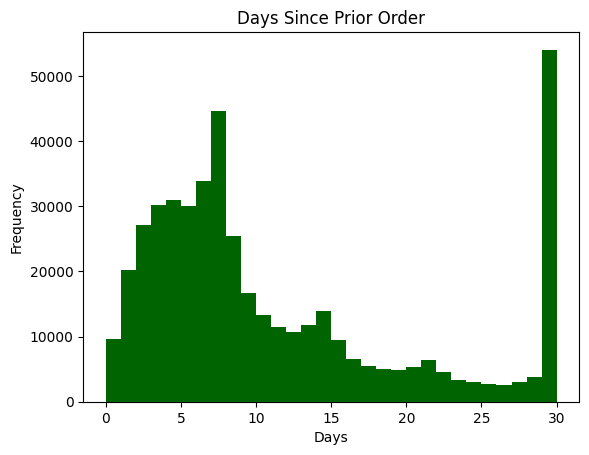

Minimum days since prior order: 0.0
Maximum days since prior order: 30.0


In [ ]:
days_wait = df_inst['days_since_prior_order'].dropna()

days_wait.plot(kind='hist', bins=30, color='darkgreen', title="Days Since Prior Order")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

min_days = days_wait.min()
max_days = days_wait.max()
print("Minimum days since prior order:", min_days)
print("Maximum days since prior order:", max_days)

Escribe aquí tus conclusiones

El histograma de days_since_prior_order permite ver la distribución del tiempo entre pedidos; el valor mínimo (después de eliminar NaN) y el valor máximo evidencian la variabilidad en la frecuencia de compras de los clientes.

La barra más alta está en el día 30, lo que indica que muchos clientes están haciendo pedidos después de un mes. Esto podría sugerir que muchos usuarios hacen pedidos de manera mensual.

Pico en el Día 5-7:
Aunque no es tan alto como el de 30 días, el intervalo de 5 a 7 días también tiene una frecuencia significativa, mostrando que muchas personas vuelven a hacer pedidos casi a la semana.

Minimum days since prior order: 0.0
Maximum days since prior order: 30.0

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [ ]:
wednesday = df_inst[df_inst['order_dow'] == 3]
saturday = df_inst[df_inst['order_dow'] == 6]

In [ ]:
wednesday_counts = wednesday.groupby('order_hour_of_day')['order_id'].count()
saturday_counts = saturday.groupby('order_hour_of_day')['order_id'].count()

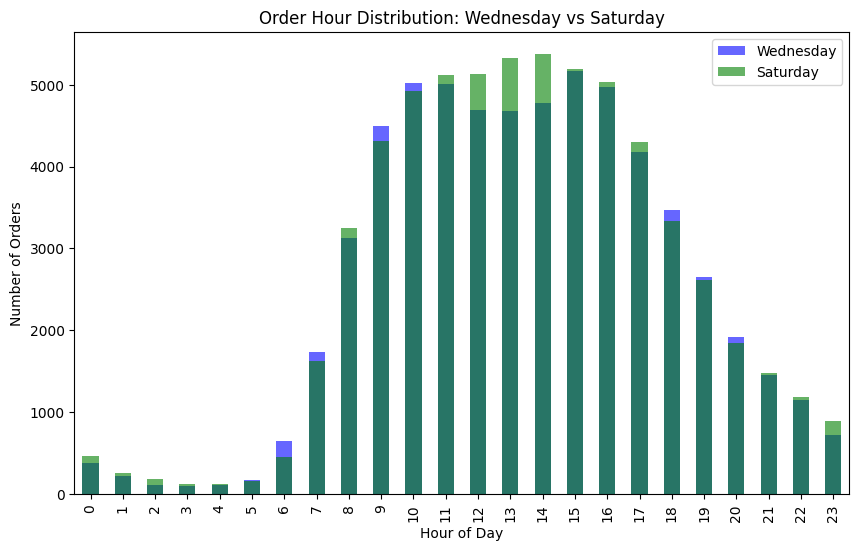

In [ ]:
plt.figure(figsize=(10,6))
wednesday_counts.plot(kind='bar', color='blue', alpha=0.6, label='Wednesday')
saturday_counts.plot(kind='bar', color='green', alpha=0.6, label='Saturday')
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
plt.title("Order Hour Distribution: Wednesday vs Saturday")
plt.legend()
plt.show()

Escribe aquí tus conclusiones

Conclusión: En el gráfico se observa que la distribución de pedidos a lo largo del día varía entre miércoles y sábado. Por ejemplo, es posible que los miércoles haya picos en ciertas horas (como durante la mañana) y los sábados una distribución más dispersa o con picos en otros momentos. Estos patrones pueden reflejar diferencias en el comportamiento de compra entre mitad de semana y fin de semana. Sin embargo, el verde claro es el color que representa los pedidos de los sábados, y está predominando en la mayoría de las horas, eso significa que los sábados tienen un mayor número de pedidos en esas horas en comparación con los miércoles.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [ ]:
orders_per_customer = df_inst.groupby('user_id')['order_id'].count()
print(orders_per_customer.head())

user_id
2    2
4    2
5    1
6    2
7    2
Name: order_id, dtype: int64


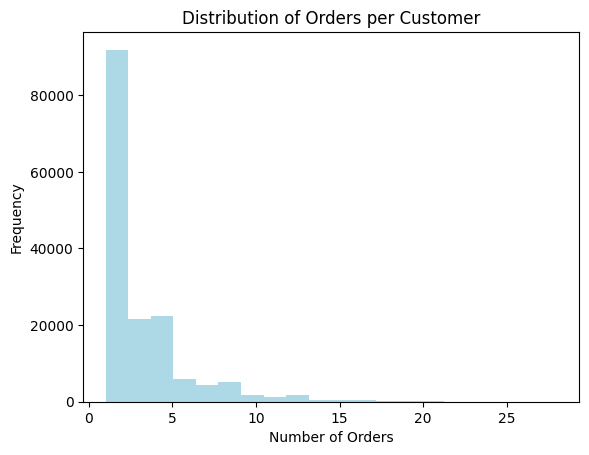

In [ ]:
orders_per_customer.plot(kind='hist', bins=20, color='lightblue', title="Distribution of Orders per Customer")
plt.xlabel("Number of Orders")
plt.ylabel("Frequency")
plt.show()

Escribe aquí tus conclusiones

Se crea un histograma para mostrar cuántos clientes realizaron 1, 2, 3... pedidos.

Con 20 contenedores (bins) se visualiza la distribución, y se añaden etiquetas y título.

Conclusión:

Lo que se puede observar en la gráfica, es que muchos clientes han realizado muy pocos pedidos (probablemente 1 o 2). Esto sugiere que la mayoría son nuevos o no compran con frecuencia, por otro lado, también sugiere que un gran número de clientes han hecho muy pocos pedidos, lo cual podría indicar que el negocio tiene una alta tasa de nuevos usuarios o que muchos clientes no vuelven a comprar.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [ ]:
product_counts = df_ord.groupby('product_id')['order_id'].count().sort_values(ascending=False)

In [ ]:
top_20 = product_counts.head(20)
print(top_20)

product_id
24852    66050
13176    53297
21137    37039
21903    33971
47209    29773
47766    24689
47626    21495
16797    20018
26209    19690
27845    19600
27966    19197
22935    15898
24964    15292
45007    14584
39275    13879
49683    13675
28204    12544
5876     12232
8277     11993
40706    11781
Name: order_id, dtype: int64


In [ ]:
top_20_products = pd.merge(top_20.reset_index(), df_prod[['product_id', 'product_name']], on='product_id', how='left')
print(top_20_products)

    product_id  order_id              product_name
0        24852     66050                    Banana
1        13176     53297    Bag of Organic Bananas
2        21137     37039      Organic Strawberries
3        21903     33971      Organic Baby Spinach
4        47209     29773      Organic Hass Avocado
5        47766     24689           Organic Avocado
6        47626     21495               Large Lemon
7        16797     20018              Strawberries
8        26209     19690                     Limes
9        27845     19600        Organic Whole Milk
10       27966     19197       Organic Raspberries
11       22935     15898      Organic Yellow Onion
12       24964     15292            Organic Garlic
13       45007     14584          Organic Zucchini
14       39275     13879       Organic Blueberries
15       49683     13675            Cucumber Kirby
16       28204     12544        Organic Fuji Apple
17        5876     12232             Organic Lemon
18        8277     11993  Apple

Escribe aquí tus conclusiones

Los 20 productos más populares muestran una alta frecuencia de pedidos. Esto sugiere que hay algunos productos clave que impulsan la mayoría de las ventas, y conocer estos productos puede ayudar a optimizar la oferta y promociones.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [ ]:
items_per_order = df_ord.groupby('order_id')['product_id'].count()
print(items_per_order.head())

order_id
4     13
9     15
11     5
19     3
20     8
Name: product_id, dtype: int64


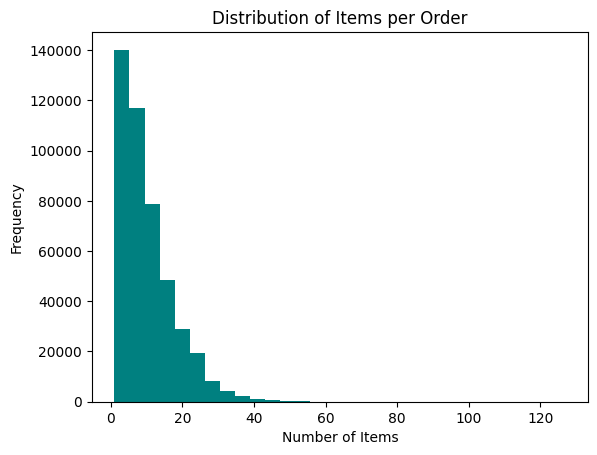

In [ ]:
items_per_order.plot(kind='hist', bins=30, color='teal', title="Distribution of Items per Order")
plt.xlabel("Number of Items")
plt.ylabel("Frequency")
plt.show()

In [ ]:
min_items = items_per_order.min()
max_items = items_per_order.max()
mean_items = items_per_order.mean()
print("Minimum items per order:", min_items)
print("Maximum items per order:", max_items)
print("Average items per order:", mean_items)

Minimum items per order: 1
Maximum items per order: 127
Average items per order: 10.098983215049127


Escribe aquí tus conclusiones

La mayoría de los pedidos se sitúan entre 1 y 2 artículos. Esto se puede interpretar como la cantidad más común de productos que las personas deciden comprar en un solo pedido. El hecho de que haya un alto número de pedidos en ese rango sugiere que los clientes tienden a comprar en pequeñas cantidades, lo que podría deberse a varios factores, como la necesidad inmediata, la falta de espacio, o incluso por razones económicas. También se puede observar que a medida de que se mueve a la derecha en el eje X, se ve que la frecuencia disminuye drásticamente para cantidades mayores. Esto indica que es menos común ver pedidos con muchos artículos (por ejemplo, más de 10) en comparación con los más pequeños.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [ ]:
reorder_counts = df_ord.groupby('product_id')['reordered'].sum()

In [ ]:
top20_reorders = reorder_counts.sort_values(ascending=False).head(20)
print(top20_reorders)

product_id
24852    55763
13176    44450
21137    28639
21903    26233
47209    23629
47766    18743
27845    16251
47626    15044
27966    14748
16797    13945
26209    13327
22935    11145
24964    10411
45007    10076
49683     9538
28204     8989
8277      8836
39275     8799
5876      8412
49235     8389
Name: reordered, dtype: int64


In [ ]:
top20_products = pd.merge(top20_reorders.reset_index(), df_prod[['product_id','product_name']], on='product_id', how='left')
print(top20_products)

    product_id  reordered              product_name
0        24852      55763                    Banana
1        13176      44450    Bag of Organic Bananas
2        21137      28639      Organic Strawberries
3        21903      26233      Organic Baby Spinach
4        47209      23629      Organic Hass Avocado
5        47766      18743           Organic Avocado
6        27845      16251        Organic Whole Milk
7        47626      15044               Large Lemon
8        27966      14748       Organic Raspberries
9        16797      13945              Strawberries
10       26209      13327                     Limes
11       22935      11145      Organic Yellow Onion
12       24964      10411            Organic Garlic
13       45007      10076          Organic Zucchini
14       49683       9538            Cucumber Kirby
15       28204       8989        Organic Fuji Apple
16        8277       8836  Apple Honeycrisp Organic
17       39275       8799       Organic Blueberries
18        58

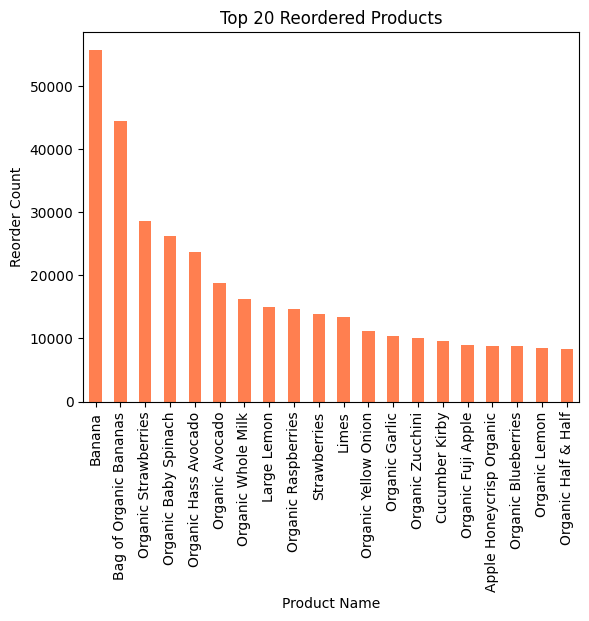

In [ ]:
top20_products.set_index('product_name')['reordered'].plot(kind='bar', color='coral', title="Top 20 Reordered Products")
plt.xlabel("Product Name")
plt.ylabel("Reorder Count")
plt.show()

Escribe aquí tus conclusiones

Los 20 productos que se reordenan con mayor frecuencia son los listados, lo que sugiere que ciertos productos tienen una alta fidelidad o demanda recurrente.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [ ]:
product_order_stats = df_ord.groupby('product_id').agg(total_orders=('order_id', 'count'),
total_reorders=('reordered', 'sum'))
print(product_order_stats.head())

            total_orders  total_reorders
product_id                              
1                    280             158
2                     11               0
3                     42              31
4                     49              25
7                      2               1


In [ ]:
product_order_stats['reorder_rate'] = product_order_stats['total_reorders'] / product_order_stats['total_orders']
print(product_order_stats.head())

            total_orders  total_reorders  reorder_rate
product_id                                            
1                    280             158      0.564286
2                     11               0      0.000000
3                     42              31      0.738095
4                     49              25      0.510204
7                      2               1      0.500000


In [ ]:
product_reorder_info = pd.merge(product_order_stats.reset_index(), df_prod[['product_id', 'product_name']], on='product_id', how='left')
print(product_reorder_info.head())

   product_id  total_orders  total_reorders  reorder_rate  \
0           1           280             158      0.564286   
1           2            11               0      0.000000   
2           3            42              31      0.738095   
3           4            49              25      0.510204   
4           7             2               1      0.500000   

                                        product_name  
0                         Chocolate Sandwich Cookies  
1                                   All-Seasons Salt  
2               Robust Golden Unsweetened Oolong Tea  
3  Smart Ones Classic Favorites Mini Rigatoni Wit...  
4                     Pure Coconut Water With Orange  


Escribe aquí tus conclusiones

El cálculo de la tasa de reorden por producto nos muestra qué tan frecuentemente, en proporción, se vuelve a pedir cada producto. Esto puede ayudar a identificar productos con alta recurrencia y, por ende, con alta fidelidad de compra.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [ ]:
orders_users = pd.merge(df_ord, df_inst[['order_id','user_id']], on='order_id', how='left')
print(orders_users.head())

   order_id  product_id  add_to_cart_order  reordered  user_id
0   2141543       11440                 17          0    58454
1    567889        1560                  1          1   129474
2   2261212       26683                  1          1    47476
3    491251        8670                 35          1   134505
4   2571142        1940                  5          1   155995


In [ ]:
user_stats = orders_users.groupby('user_id').agg(
    total_products=('order_id', 'count'),
    total_reorders=('reordered', 'sum'))

user_stats['reorder_rate'] = user_stats['total_reorders'] / user_stats['total_products']
print(user_stats.head())

         total_products  total_reorders  reorder_rate
user_id                                              
2                    26               1      0.038462
4                     2               0      0.000000
5                    12               8      0.666667
6                     4               0      0.000000
7                    14              13      0.928571


Escribe aquí tus conclusiones

La tasa de repetición de pedido por cliente, calculada como la proporción de productos reordenados sobre el total de productos pedidos, nos indica qué tan recurrente es el comportamiento de compra de cada usuario.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [ ]:
first_items = df_ord[df_ord['add_to_cart_order'] == 1]
print(first_items.head())

    order_id  product_id  add_to_cart_order  reordered
1     567889        1560                  1          1
2    2261212       26683                  1          1
14   1961225       37553                  1          1
16    639939       10017                  1          1
23    750040        8518                  1          0


In [ ]:
first_item_counts = first_items.groupby('product_id')['order_id'].count().sort_values(ascending=False)
print(first_item_counts.head(20))

product_id
24852    15562
13176    11026
27845     4363
21137     3946
47209     3390
21903     3336
47766     3044
19660     2336
16797     2308
27966     2024
44632     1914
49235     1797
47626     1737
196       1733
38689     1397
26209     1370
12341     1340
5785      1310
27086     1309
43352     1246
Name: order_id, dtype: int64


In [ ]:
top20_first_items = pd.merge(first_item_counts.reset_index(), df_prod[['product_id','product_name']], on='product_id', how='left')
top20_first_items = top20_first_items.rename(columns={'order_id':'first_item_count'})
print(top20_first_items.head(20))

    product_id  first_item_count                 product_name
0        24852             15562                       Banana
1        13176             11026       Bag of Organic Bananas
2        27845              4363           Organic Whole Milk
3        21137              3946         Organic Strawberries
4        47209              3390         Organic Hass Avocado
5        21903              3336         Organic Baby Spinach
6        47766              3044              Organic Avocado
7        19660              2336                 Spring Water
8        16797              2308                 Strawberries
9        27966              2024          Organic Raspberries
10       44632              1914   Sparkling Water Grapefruit
11       49235              1797          Organic Half & Half
12       47626              1737                  Large Lemon
13         196              1733                         Soda
14       38689              1397     Organic Reduced Fat Milk
15      

Escribe aquí tus conclusiones

Los 20 principales artículos que se añaden primero en el carrito se identifican por su alta frecuencia al ocupar la posición 1. Esto nos da una idea de qué productos atraen más la atención inicial de los clientes.

### Conclusion general del proyecto:

En este proyecto se analizó el comportamiento de compra en la aplicación Instacart a partir de cinco datasets diferentes. Se exploraron desde las distribuciones de tiempos y días de pedido, hasta la frecuencia con la que se repiten productos y pedidos.

Los hallazgos clave incluyen:

La distribución de artículos por pedido muestra que la mayoría de los pedidos contienen pocos productos, aunque existen pedidos con muchos artículos.

Algunos productos se reordenan con mucha frecuencia, lo que indica alta fidelidad en ciertos artículos.

La tasa de repetición tanto a nivel de producto como de cliente proporciona información valiosa para entender la lealtad y el comportamiento recurrente en las compras.

Finalmente, identificar qué productos se agregan primero en los carritos permite detectar cuáles son los productos que captan la atención inicial de los clientes.

Estos análisis pueden ayudar a optimizar la oferta, mejorar las recomendaciones y orientar estrategias de marketing en la plataforma. En conjunto, el proyecto ilustra el poder del análisis de datos para extraer información útil de grandes conjuntos de datos de comercio electrónico.